In [1]:
import pandas as pd 
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
ls


 Volume in drive C is Windows-SSD
 Volume Serial Number is 6E82-34BE

 Directory of C:\Users\KUMAR SANU\Assignment\Association rule

09-04-2021  13:04    <DIR>          .
09-04-2021  13:04    <DIR>          ..
07-04-2021  14:08    <DIR>          .ipynb_checkpoints
16-03-2021  11:16            46,094 book.csv
07-04-2021  14:18           265,195 book.ipynb
09-04-2021  13:04             1,589 my_movie.ipynb
16-03-2021  11:16               767 my_movies.csv
16-03-2021  11:16               274 Problem_Statment.txt
               5 File(s)        313,919 bytes
               3 Dir(s)  190,554,431,488 bytes free


In [3]:
movie=pd.read_csv('my_movies.csv')
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
movie.isnull()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
2,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
6,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
7,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
8,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [5]:
movie_df=movie.dropna(axis=1)

In [7]:
for i in movie_df.columns:
    print(i)
    print(movie_df[i].value_counts())
    print()

V1
Gladiator        6
Sixth Sense      2
Harry Potter1    1
LOTR1            1
Name: V1, dtype: int64

V2
Patriot          6
LOTR2            1
LOTR1            1
LOTR             1
Harry Potter2    1
Name: V2, dtype: int64

Sixth Sense
1    6
0    4
Name: Sixth Sense, dtype: int64

Gladiator
1    7
0    3
Name: Gladiator, dtype: int64

LOTR1
0    8
1    2
Name: LOTR1, dtype: int64

Harry Potter1
0    8
1    2
Name: Harry Potter1, dtype: int64

Patriot
1    6
0    4
Name: Patriot, dtype: int64

LOTR2
0    8
1    2
Name: LOTR2, dtype: int64

Harry Potter2
0    9
1    1
Name: Harry Potter2, dtype: int64

LOTR
0    9
1    1
Name: LOTR, dtype: int64

Braveheart
0    9
1    1
Name: Braveheart, dtype: int64

Green Mile
0    8
1    2
Name: Green Mile, dtype: int64



In [8]:
movie_df

,V1,V2,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,1,1,0,0,0,0,0,1,0,1


In [9]:
df=pd.get_dummies(movie_df)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot
0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\s

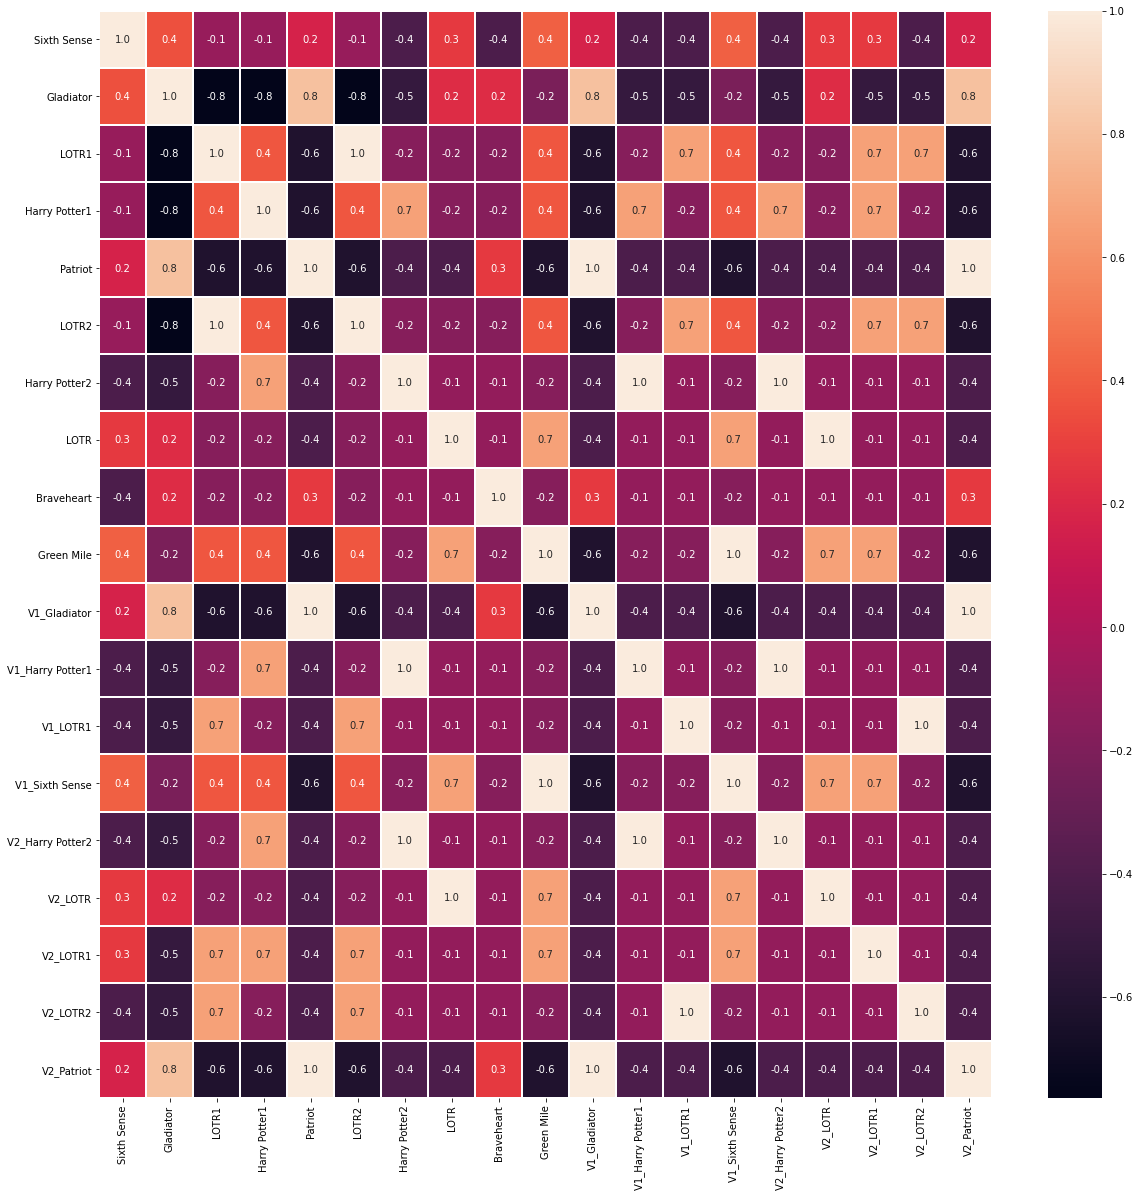

In [19]:
# Correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(method='spearman'),annot=True,fmt=".1f",linewidths=1,ax=ax)
plt.show()
#co-relation between each variable is very less

C:\Users\KUMAR SANU\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KUMAR SANU\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KUMAR SANU\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

IndexError: list index out of range

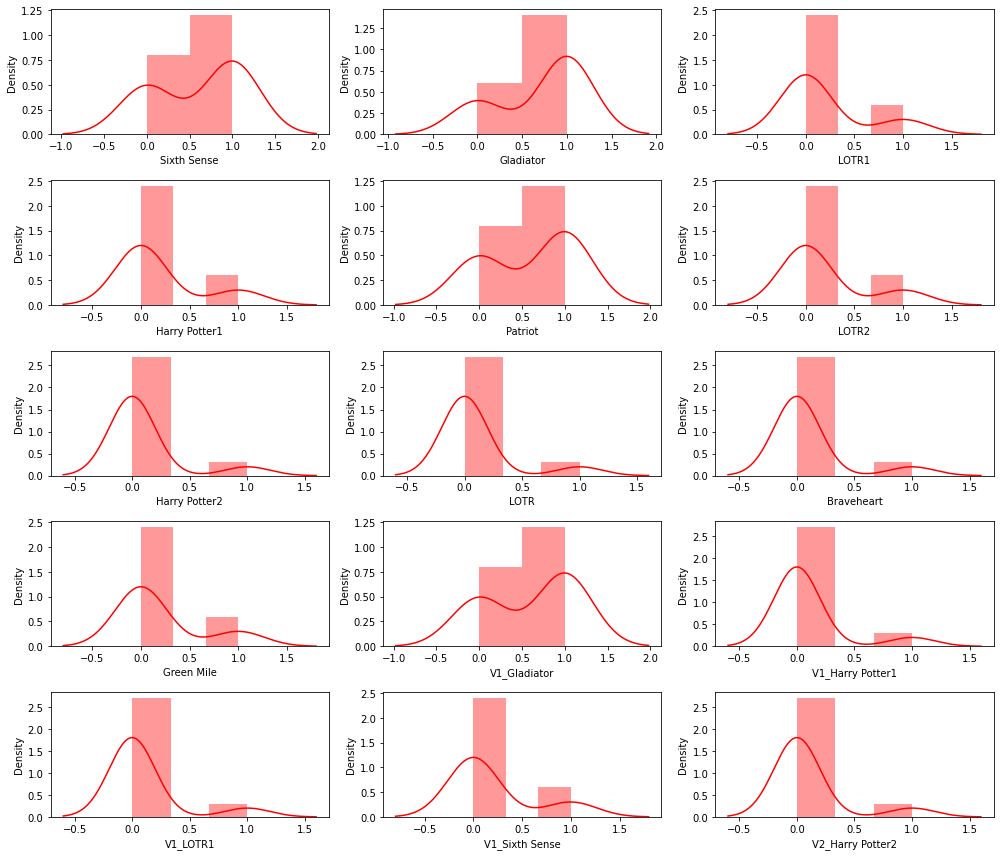

In [20]:
# Density plot for each attribute
fig, ax = plt.subplots(5,3, figsize=(14,12))
axes_ = [axes_row for axes in ax for axes_row in axes]
for i,c in enumerate(df.columns):
    sns.distplot(df[c], ax = axes_[i], color = 'red')
    plt.tight_layout()

Apriori Algorithm

In [13]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True) #so
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
248,0.1,"(V1_Sixth Sense, Green Mile, V2_LOTR1, Sixth S..."
249,0.1,"(V1_Sixth Sense, LOTR2, Green Mile, V2_LOTR1, ..."
250,0.1,"(V1_Sixth Sense, LOTR2, Green Mile, V2_LOTR1, ..."
251,0.1,"(V1_Sixth Sense, LOTR2, Green Mile, V2_LOTR1, ..."


In [14]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
2903,(Green Mile),"(V1_Sixth Sense, LOTR2, V2_LOTR1, LOTR1, Sixth...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
2904,(V2_LOTR1),"(V1_Sixth Sense, LOTR2, Green Mile, LOTR1, Six...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
2905,(Sixth Sense),"(V1_Sixth Sense, LOTR2, Green Mile, V2_LOTR1, ...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
2906,(LOTR1),"(V1_Sixth Sense, LOTR2, Green Mile, V2_LOTR1, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [15]:
rules.sort_values('lift',ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
823,"(Sixth Sense, V2_LOTR1)","(V1_Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
1987,"(LOTR2, Sixth Sense, V1_Sixth Sense, Green Mile)",(V2_LOTR1),0.1,0.1,0.1,1.0,10.0,0.09,inf
2035,"(Green Mile, V2_LOTR)","(LOTR, V1_Sixth Sense, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
2036,"(Sixth Sense, V2_LOTR)","(LOTR, V1_Sixth Sense, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
2039,"(LOTR, Green Mile)","(V1_Sixth Sense, Sixth Sense, V2_LOTR)",0.1,0.1,0.1,1.0,10.0,0.09,inf
2040,"(LOTR, Sixth Sense)","(V1_Sixth Sense, Green Mile, V2_LOTR)",0.1,0.1,0.1,1.0,10.0,0.09,inf
2042,(V2_LOTR),"(LOTR, Sixth Sense, V1_Sixth Sense, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
2045,(LOTR),"(Sixth Sense, V1_Sixth Sense, Green Mile, V2_L...",0.1,0.1,0.1,1.0,10.0,0.09,inf
2076,"(V1_Sixth Sense, Green Mile, Gladiator, V2_LOTR)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
2078,"(LOTR, V1_Sixth Sense, Green Mile, Gladiator)",(V2_LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf


In [16]:
rules[rules.lift>1]   

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
2903,(Green Mile),"(V1_Sixth Sense, LOTR2, V2_LOTR1, LOTR1, Sixth...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
2904,(V2_LOTR1),"(V1_Sixth Sense, LOTR2, Green Mile, LOTR1, Six...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
2905,(Sixth Sense),"(V1_Sixth Sense, LOTR2, Green Mile, V2_LOTR1, ...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
2906,(LOTR1),"(V1_Sixth Sense, LOTR2, Green Mile, V2_LOTR1, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


The person who is whatching (Sixth Sense) probabbly he/she will watch Gladiator because confidenec level is high 